In [50]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

In [3]:
# for layer in base_model.layers:
#     layer.trainable = False

In [55]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
base_dir = '/content/drive/MyDrive/crackdataset/dataset'

In [6]:
import tensorflow as tf
base_model = tf.models.load_model('/content/drive/MyDrive/Colab Notebooks/crack150.h5')

AttributeError: ignored

In [59]:
import os

# base_dir = './dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'Positive')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'Negative')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'Positive')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'Negative')

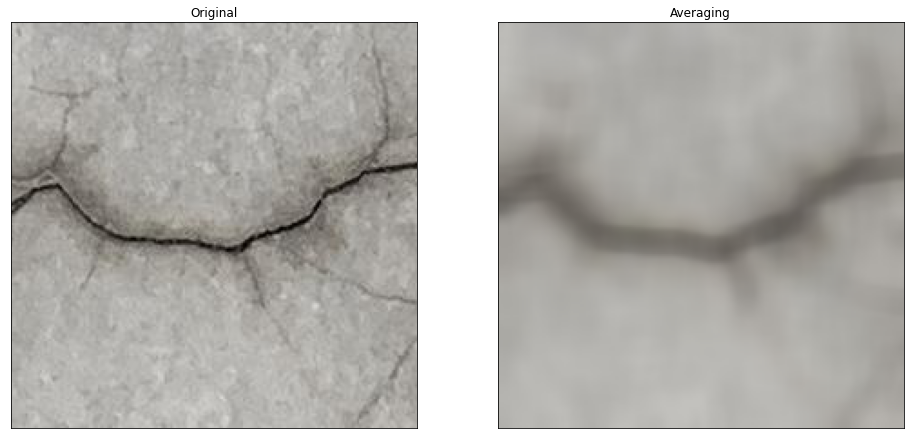

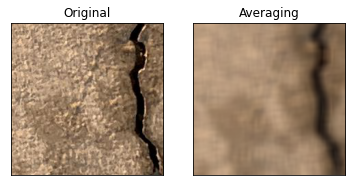

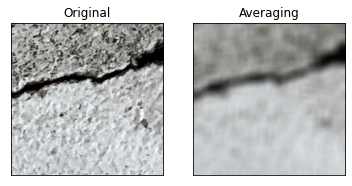

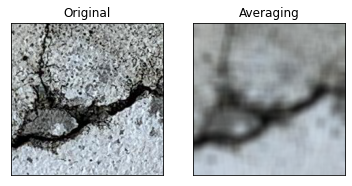

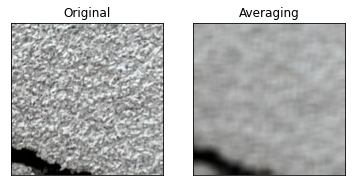

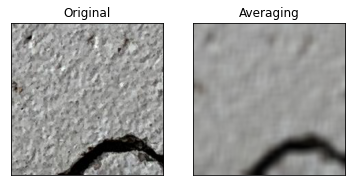

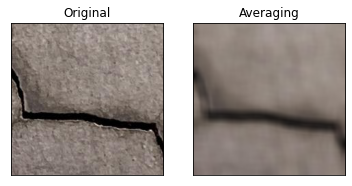

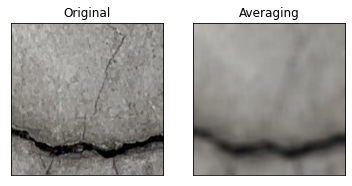

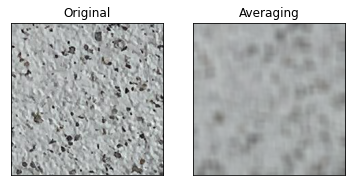

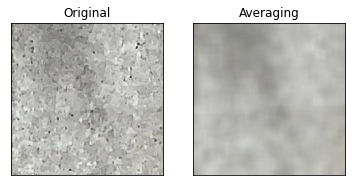

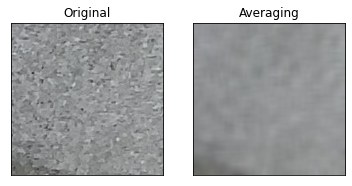

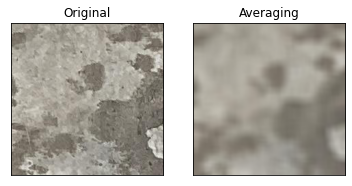

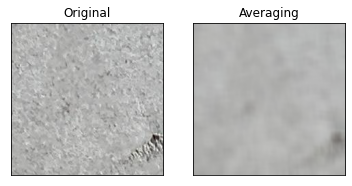

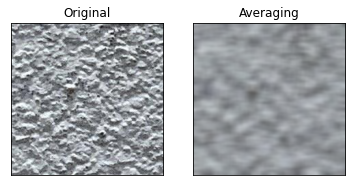

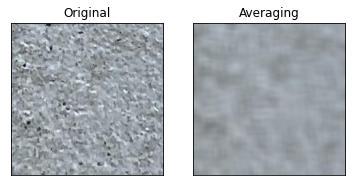

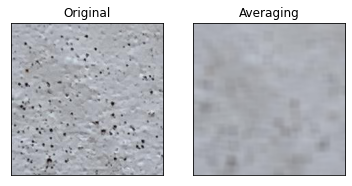

In [63]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( validation_cats_dir )
train_dog_fnames = os.listdir( validation_dogs_dir )


next_cat_pix = [os.path.join(validation_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(validation_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  # sp = plt.subplot(nrows, ncols, i + 1)
  # sp.axis('Off') # Don't show axes (or gridlines)
  import cv2 as cv
  import numpy as np
  img = mpimg.imread(img_path)
  kernel = np.ones((15,15),np.float32)/225
  dst = cv.filter2D(img,-1,kernel)
  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
  plt.xticks([]), plt.yticks([])
  plt.show()
  # plt.imshow(img)

plt.show()

In [68]:
import cv2

image = os.listdir()
image = cv2.imread('./content/drive/MyDrive/crackdataset/dataset/predict/sub/IMG_1129.JPG')

import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
cv2_imshow(image)
new_image = np.zeros(image.shape, image.dtype)
alpha = 1.0 # Simple contrast control
beta = 0    # Simple brightness control
# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)

new_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
cv2_imshow('Original Image', image)
cv2_imshow('New Image', new_image)

AttributeError: ignored

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# # Add our data-augmentation parameters to ImageDataGenerator
# train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 8, class_mode = 'binary', target_size = (150, 150))
# validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 8, class_mode = 'binary', target_size = (150, 150))

Found 600 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
# # Flatten the output layer to 1 dimension
# import tensorflow as tf
# from tensorflow.keras import layers

# from tensorflow.keras.optimizers import RMSprop

# x = layers.Flatten()(base_model.output)
# x = layers.Dense(1024, activation='relu')(x)
# x = layers.Dropout(0.2)(x)

# # Add a final sigmoid layer with 1 node for classification output
# x = layers.Dense(1, activation='sigmoid')(x)

# model = tf.keras.models.Model(base_model.input, x)

# model.compile(optimizer = RMSprop(lr=0.000003), loss = 'binary_crossentropy', metrics = ['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 75, epochs = 150)

Epoch 1/150


<ipython-input-41-36392433b7a2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 75, epochs = 150)


75/75 [==============================] - 12s 112ms/step - loss: 0.6786 - acc: 0.6250 - val_loss: 0.5455 - val_acc: 0.6900
Epoch 2/150
75/75 [==============================] - 7s 98ms/step - loss: 0.5169 - acc: 0.7617 - val_loss: 0.4921 - val_acc: 0.7450
Epoch 3/150
75/75 [==============================] - 7s 89ms/step - loss: 0.4519 - acc: 0.8150 - val_loss: 0.4583 - val_acc: 0.7950
Epoch 4/150
75/75 [==============================] - 7s 92ms/step - loss: 0.4468 - acc: 0.7917 - val_loss: 0.4398 - val_acc: 0.8250
Epoch 5/150
75/75 [==============================] - 7s 91ms/step - loss: 0.4238 - acc: 0.8200 - val_loss: 0.4296 - val_acc: 0.8050
Epoch 6/150
75/75 [==============================] - 7s 93ms/step - loss: 0.3795 - acc: 0.8333 - val_loss: 0.4099 - val_acc: 0.8400
Epoch 7/150
75/75 [==============================] - 7s 92ms/step - loss: 0.4038 - acc: 0.8417 - val_loss: 0.3839 - val_acc: 0.8900
Epoch 8/150
75/75 [==============================] - 7s 90ms/step - loss: 0.3649 - acc

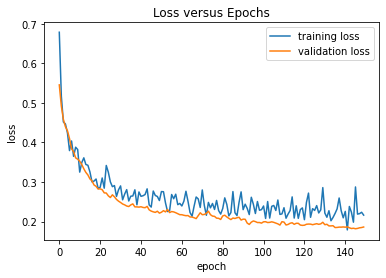

In [ ]:
# plt.plot(inc_history.epoch, inc_history.history['loss'], label='training loss')
# plt.plot(inc_history.epoch, inc_history.history['val_loss'], label='validation loss')
# plt.legend()
# plt.xlabel('epoch')
# plt.ylabel('loss')
# plt.title('Loss versus Epochs')
# plt.show()

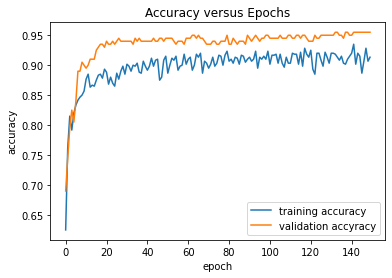

In [ ]:
# plt.plot(inc_history.epoch, inc_history.history['acc'], label='training accuracy')
# plt.plot(inc_history.epoch, inc_history.history['val_acc'], label='validation accyracy')
# plt.legend()
# plt.xlabel('epoch')
# plt.ylabel('accuracy')
# plt.title('Accuracy versus Epochs')
# plt.show()

In [7]:

# test_dir = os.path.join(base_dir, 'test')

# # Directory with our training cat pictures
# test_cats_dir = os.path.join(test_dir, 'Positive')

# # Directory with our training dog pictures
# test_dogs_dir = os.path.join(test_dir, 'Negative')

# nrows = 4
# ncols = 4

# fig = plt.gcf()
# fig.set_size_inches(ncols*4, nrows*4)
# pic_index = 100
# test_cat_fnames = os.listdir( test_cats_dir )
# test_dog_fnames = os.listdir( test_dogs_dir )


# next_cat_pix = [os.path.join(test_cats_dir, fname) 
#                 for fname in test_cat_fnames[ pic_index-8:pic_index] 
#                ]

# next_dog_pix = [os.path.join(test_dogs_dir, fname) 
#                 for fname in test_dog_fnames[ pic_index-8:pic_index]
#                ]

# for i, img_path in enumerate(next_cat_pix+next_dog_pix):
#   # Set up subplot; subplot indices start at 1
#   sp = plt.subplot(nrows, ncols, i + 1)
#   sp.axis('Off') # Don't show axes (or gridlines)

#   img = mpimg.imread(img_path)
#   plt.imshow(img)

# plt.show()

In [8]:

# test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# test_generator = test_datagen.flow_from_directory(test_dir, batch_size = 8, class_mode = 'binary', target_size = (150, 150))

In [9]:
# results = model.evaluate(test_generator, batch_size=128)
# print("test loss, test acc:", results)

In [12]:
import os

pred_dir = os.path.join(base_dir, 'predict')

pred_datagen = ImageDataGenerator( rescale = 1.0/255. )
pred_generator = pred_datagen.flow_from_directory(pred_dir, batch_size = 1, class_mode = None, target_size = (150, 150))

Found 6 images belonging to 2 classes.


In [48]:
import matplotlib.pyplot as plt

def predict(image, base_model=None, tile_size=[30,30]):
    '''
    just image generation for now
    '''
    # print(image)
    plt.imshow(image, interpolation='nearest')
    plt.show()
    image_shape = tf.shape(image)
    # print(image_shape)
    tile_rows = tf.reshape(image, [image_shape[0], -1, tile_size[0], image_shape[2]])
    # print(tile_rows.shape)
    serial_tiles = tf.transpose(tile_rows, [1,0,2,3])
    new_image = tf.reshape(serial_tiles, [-1, tile_size[1], tile_size[0], image_shape[2]])
    print(image_shape, tf.shape(new_image))
    plt.imshow(new_image[2], interpolation='nearest')
    plt.show()
    result = tf.image.resize(new_image, [150,150])
    print(result.shape)
    plt.imshow(result[2], interpolation='nearest')
    plt.show()
    return result
    pass

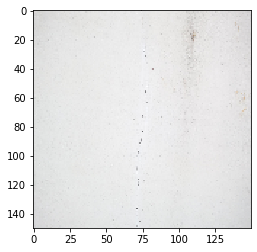

tf.Tensor([150 150   3], shape=(3,), dtype=int32) tf.Tensor([25 30 30  3], shape=(4,), dtype=int32)


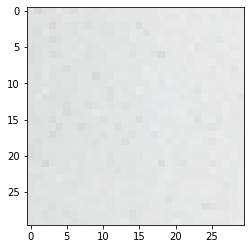

(25, 150, 150, 3)


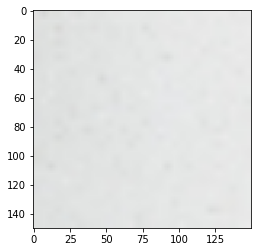

In [49]:
result = predict(next(pred_generator)[0])

In [ ]:
pred = model.predict_generator(pred_generator)

<ipython-input-52-4276ed817dfc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = model.predict_generator(pred_generator)


In [ ]:

print(pred)

'''All predict images have cracks and we detected none. So accuracy is ZERO. Recall is ZERO. Precision not defined.'''

[[0.46894017]
 [0.1918182 ]
 [0.25673467]
 [0.37259963]
 [0.15653963]
 [0.19808787]]


'All predict images have cracks and we detected none. So accuracy is ZERO. Recall is ZERO. Precision not defined.'